# CREDIT CARD FRAUD DETECTION

# Asena Austine

# Introduction

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. Eventually, it is also important for companies NOT to detect transactions which are genuine as fraudulent, otherwise, companies would keep blocking the credit card, and which may lead to customer dissatisfaction. So here are two important expects of this analysis:

What would happen when the company will not able to detect the fraudulent transaction and would not confirm from a customer about this recent transaction whether it was made by him/her.

In contract, what would happen when the company will detect a genuine transaction as fraudulent and keep calling customer for confirmation or might block the card.

The datasets contain transactions that have 492 frauds out of 284,807 transactions. So the dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. When we try to build the prediction model with this kind of unbalanced dataset, then the model will be more inclined towards to detect new unseen transaction as genuine as our dataset contains about 99% genuine data.

# importing libraries

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
#import plotly
import datetime
import math
import sklearn
from IPython.display import HTML
from IPython.display import YouTubeVideo
import warnings
warnings.filterwarnings('ignore')


# Loading the dataset

In [2]:
df= pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Due to confidentiality issue, original features V1, V2,... V28 have been transformed with PCA, however, we may guess that these features might be originally credit card number, expiry date, CVV, cardholder name, transaction location, transaction date-time, etc.

The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Exploratory Data Analysis

Once the data is read into python, we need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few columns or rows, joining some other data, and handling qualitative variables like dates.

In [3]:
df.shape

(284807, 31)

In [4]:
#checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# general statistics about the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df['Class'].count()

284807

In [9]:
Fraud=df[df['Class']==1]
Normal=df[df['Class']==0]

# Class distribution in the dataset

<AxesSubplot:xlabel='Class', ylabel='count'>

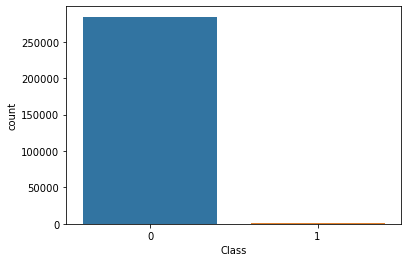

In [10]:
sns.countplot(df['Class'])

In [11]:
print(df['Class'].value_counts())
print('\n')
print(df['Class'].value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64


0    0.998273
1    0.001727
Name: Class, dtype: float64


This dataset has 492 frauds out of 284,315 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are not a fraud.

# Generate descriptive statistics

The describe() function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [12]:
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


On an average, credit card transaction is happening at every 94813.86 seconds.
Average transaction amount is 88.35 with a standard deviation of 250, with a minimum amount of 0.0 and the maximum amount 25,691.16. By seeing the 75% and the maximum amount, it looks like the feature 'Amount' is highly positively skewed. We will check the distribution graph of the amount to get more clarity.

# Distribution of Amount

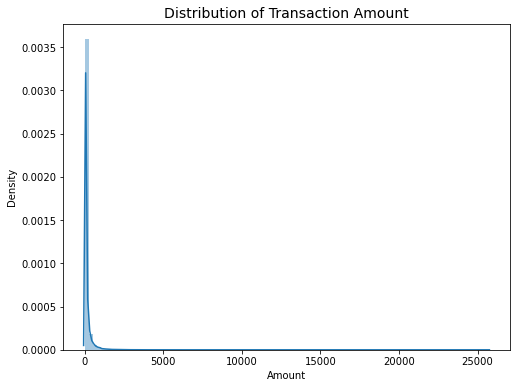

In [13]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(df['Amount'], bins=100)
plt.show()

# Distribution of Amount for Fradulent & Genuine transactions

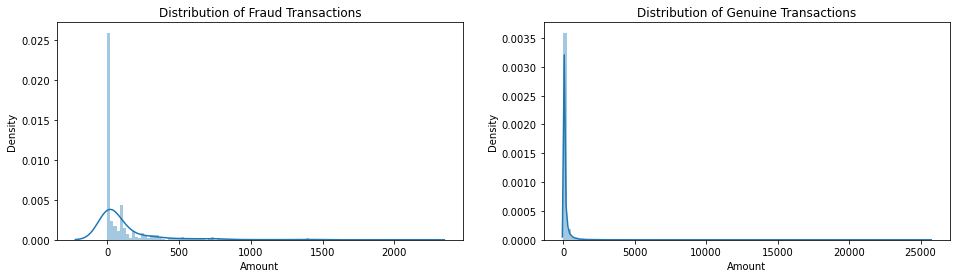

In [14]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['Class'] == 0]['Amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

# Distribution of Time

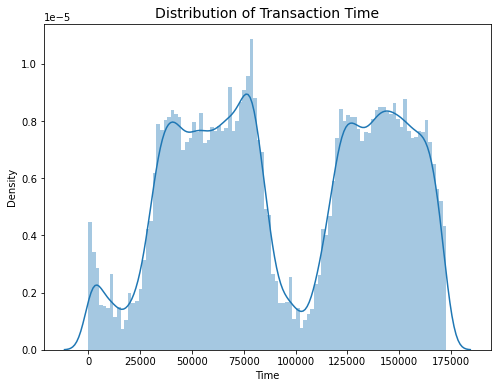

In [15]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['Time'], bins=100)
plt.show()

# Distribution of transaction type w.r.t amount

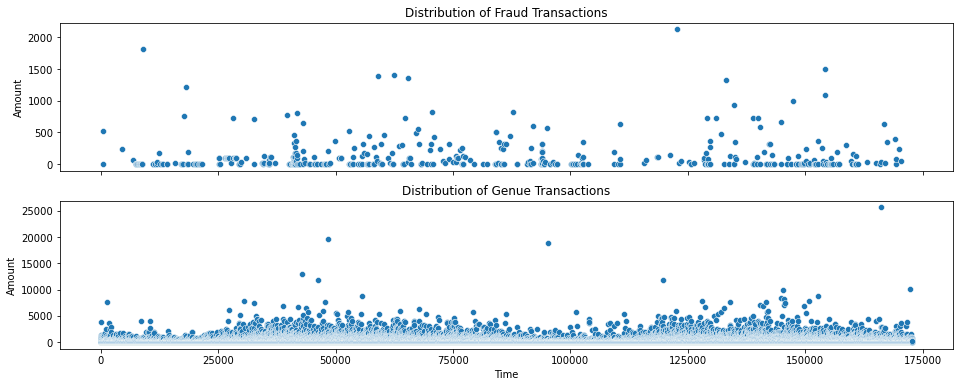

In [16]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")

plt.show()

# Feature Engineering¶

In [17]:
# Converting time from second to hour
df['Time'] = df['Time'].apply(lambda sec : (sec/3600))

In [18]:
# Calculating hour of the day
df['Hour'] = df['Time']%24   # 2 days of data
df['Hour'] = df['Hour'].apply(lambda x : math.floor(x))

In [19]:
# Calculating First and Second day
df['Day'] = df['Time']/24   # 2 days of data
df['Day'] = df['Day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

In [20]:
df[['Time','Hour','Day','Amount','Class']]

,Time,Hour,Day,Amount,Class
0,0.000000,0,1,149.62,0
1,0.000000,0,1,2.69,0
2,0.000278,0,1,378.66,0
3,0.000278,0,1,123.50,0
4,0.000556,0,1,69.99,0
...,...,...,...,...,...
284802,47.996111,23,2,0.77,0
284803,47.996389,23,2,24.79,0
284804,47.996667,23,2,67.88,0
284805,47.996667,23,2,10.00,0


# Fraud and Genuine transaction Day wise

In [21]:
# calculating fraud transaction daywise
dayFrdTran = df[(df['Class'] == 1)]['Day'].value_counts()

# calculating genuine transaction daywise
dayGenuTran = df[(df['Class'] == 0)]['Day'].value_counts()

# calculating total transaction daywise
dayTran = df['Day'].value_counts()

print("No of transaction Day wise:")
print(dayTran)

print("\n")

print("No of fraud transaction Day wise:")
print(dayFrdTran)

print("\n")

print("No of genuine transactions Day wise:")
print(dayGenuTran)

print("\n")

print("Percentage of fraud transactions Day wise:")
print((dayFrdTran/dayTran)*100)

No of transaction Day wise:
1    144787
2    140020
Name: Day, dtype: int64


No of fraud transaction Day wise:
1    281
2    211
Name: Day, dtype: int64


No of genuine transactions Day wise:
1    144506
2    139809
Name: Day, dtype: int64


Percentage of fraud transactions Day wise:
1    0.194078
2    0.150693
Name: Day, dtype: float64


Total number of transaction on Day 1 was 144787, out of which 281 was a fraud and 144506 was genuine. Fraud transaction was 0.19% of the total transaction on day 1.

Total number of transaction on Day 2 was 140020, out of which 211 was a fraud and 139809 was genuine. Fraud transaction was 0.15% of the total transaction on day 2.

Most of the transaction including the fraud transaction happened on day 1.

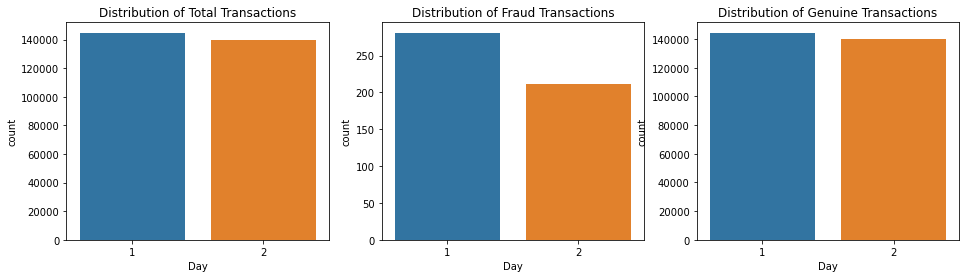

In [22]:
fig, axs = plt.subplots(ncols=3, figsize=(16,4))

sns.countplot(df['Day'], ax=axs[0])
axs[0].set_title("Distribution of Total Transactions")

sns.countplot(df[(df['Class'] == 1)]['Day'], ax=axs[1])
axs[1].set_title("Distribution of Fraud Transactions")

sns.countplot(df[(df['Class'] == 0)]['Day'], ax=axs[2])
axs[2].set_title("Distribution of Genuine Transactions")

plt.show()

# Scale Amount Feature

It is a good idea to scale the data so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range. like a column like age has a range between 0 to 80, but a column like a salary has ranged from thousands to lakhs, hence, salary column will dominate to predict the outcome even if it may not be important.
In addition, features having different unit should also be scaled thus providing each feature equal initial weightage. Like Age in years and Sales in Dollars must be brought down to a common scale before feeding it to the ML algorithm
This will result in a better prediction model.

1. Scale amount by Log

In [23]:
# Scale amount by log
# Adding a small amount of 0.0001 to amount as log of zero is infinite.
df['Amount_log'] = np.log(df.Amount + 1)

2. Scale amount by Standardization

In [24]:
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
df['Amount_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))

3. Scale amount by Normalization¶

In [25]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() # object of the class StandardScaler ()
df['Amount_minmax'] = mm.fit_transform(df['Amount'].values.reshape(-1,1))

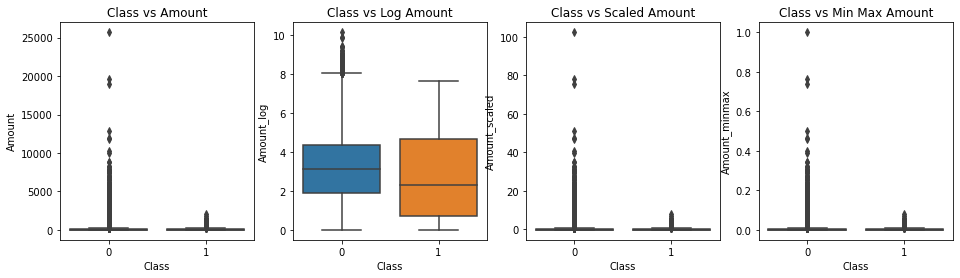

In [26]:
#Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="Class",y="Amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="Class",y="Amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="Class",y="Amount_scaled",data=df, ax = axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x ="Class",y="Amount_minmax",data=df, ax = axs[3])
axs[3].set_title("Class vs Min Max Amount")
plt.show()

We can see a slight difference in the log amount of our two Classes.
The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have the highest values.

In [27]:
df[['Time','Hour','Day','Amount','Amount_log','Amount_scaled','Amount_minmax','Class']]

,Time,Hour,Day,Amount,Amount_log,Amount_scaled,Amount_minmax,Class
0,0.000000,0,1,149.62,5.014760,0.244964,0.005824,0
1,0.000000,0,1,2.69,1.305626,-0.342475,0.000105,0
2,0.000278,0,1,378.66,5.939276,1.160686,0.014739,0
3,0.000278,0,1,123.50,4.824306,0.140534,0.004807,0
4,0.000556,0,1,69.99,4.262539,-0.073403,0.002724,0
...,...,...,...,...,...,...,...,...
284802,47.996111,23,2,0.77,0.570980,-0.350151,0.000030,0
284803,47.996389,23,2,24.79,3.249987,-0.254117,0.000965,0
284804,47.996667,23,2,67.88,4.232366,-0.081839,0.002642,0
284805,47.996667,23,2,10.00,2.397895,-0.313249,0.000389,0


# Model building

In [28]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour', 'Day', 'Amount_log', 'Amount_scaled', 'Amount_minmax'],
      dtype='object')

In [29]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the log amount and dropping the amount and scaled amount columns.
X = df.drop(['Time','Class','Hour','Day','Amount','Amount_minmax','Amount_scaled'],axis=1)
y = df['Class']

In [30]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split

In [31]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=50)

In [32]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)

X_train :  (199364, 29)
y_train :  (199364,)
X_test :  (85443, 29)
y_test :  (85443,)


# Testing Models

# 1. Logistic Regression

Logistic Regression with imbalanced data

In [33]:
from sklearn.linear_model import LogisticRegression # Importing Classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

In [34]:
y_pred = logreg.predict(X_test)

Model Evaluation

In [35]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.83      0.65      0.73       147

    accuracy                           1.00     85443
   macro avg       0.92      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [36]:
# Actual values counts for fraud and genuine of test dataset
pd.Series(y_test).value_counts()

0    85296
1      147
Name: Class, dtype: int64

There are originally 144 fraud transactions and our model predicted only 101 fraud transaction. So the accuracy of our model should be 

In [37]:
#Accuracy of the model is
(101/144)*100

70.13888888888889

However, this not the case. Actually there are originally 144 fraud transactions and 85299 genuine transactions in the test dataset. However, our model predicted only 101 fraud transaction. Also, it should be kept in mind that these 101 predicted fraud transaction may not be identified correctly. It means that these predicted 101 fraud transactions are NOT only from 144 originally fraud transaction, but they may also be from genuine transactions as well.

Using Confusion matrix

In [38]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[85277,    19],
       [   51,    96]], dtype=int64)

Text(0.5, 15.0, 'Predicted')

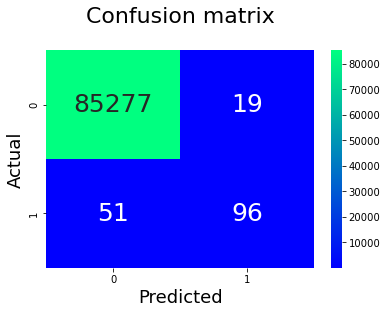

In [39]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

ROC CURVE
It is a plot between Sesitivity and ( 1 - Specificity ) , which intuitively is a plot between True Positive Rate and False Positive Rate. It depicts if a model can clearly identify each class or not

Higher the area under the curve , better the model and it's ability to seperate the positive and negative class.

In [40]:
metrics.roc_auc_score(y_test , y_pred) 

0.826419235392525

In [41]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.98931162e-01, 1.06883775e-03],
       [9.99709698e-01, 2.90302023e-04],
       [9.99962621e-01, 3.73786260e-05],
       ...,
       [9.99191650e-01, 8.08349910e-04],
       [9.99737965e-01, 2.62035354e-04],
       [9.99737106e-01, 2.62894212e-04]])

AUC -  0.826419235392525 



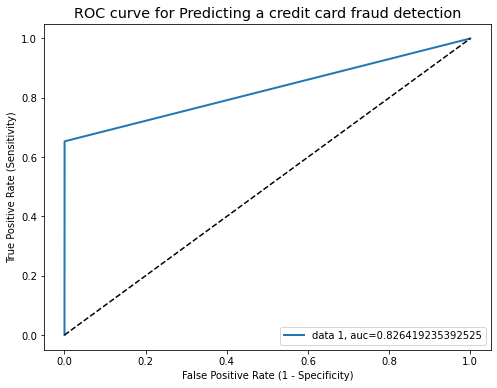

In [42]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Class Balancing

Under Sampling and Over Sampling
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set.

Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.

Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

Synthetic Minority OverSampling Technique (SMOTE)
In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.



Adaptive Synthetic Sampling Method for Imbalanced Data (ADASYN)
ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples.

In [43]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
!pip install imblearn